In [ ]:
# Step 1: Define the base class AdAnalytic
class AdAnalytic:
    def __init__(self, date, tag, sub_type, ad_type, rating, cost, predicted_ctr):
        self.date = date
        self.tag = tag
        self.sub_type = sub_type
        self.type = ad_type
        self.rating = rating
        self.cost = cost
        self.predicted_ctr = predicted_ctr
        self.unique_id = id(self)  # memory address as unique ID

    def __str__(self):
        return f"{self.unique_id},{self.date},{self.tag},{self.sub_type},{self.type},{self.rating},{self.cost},{self.predicted_ctr}"


We began by creating a base class AdAnalytic to represent individual ads using real-world attributes like date, tag, type, cost, rating, and predicted CTR. Each object also gets a unique ID. The __str__() method formats this data neatly for CSV export—setting the stage for easy analysis and visualization.


In [ ]:
# Step 2: Define the subclasses for Native and Non-Native
class NativeAdAnalytic(AdAnalytic):
    def __init__(self, date, tag, sub_type, rating, cost, predicted_ctr):
        super().__init__(date, tag, sub_type, "Native", rating, cost, predicted_ctr)

class NonNativeAdAnalytic(AdAnalytic):
    def __init__(self, date, tag, sub_type, rating, cost, predicted_ctr):
        super().__init__(date, tag, sub_type, "non-Native", rating, cost, predicted_ctr)


We extended the base class into two subclasses—NativeAdAnalytic and NonNativeAdAnalytic—to represent the two primary ad types. These classes automatically assign the correct type while keeping the structure flexible for future extensions like specific ad formats.

In [ ]:
# Step 3: Define final subclasses
class InApp(NativeAdAnalytic):
    def __init__(self, date, tag, rating, cost, predicted_ctr):
        super().__init__(date, tag, "InApp", rating, cost, predicted_ctr)

class Banner(NonNativeAdAnalytic):
    def __init__(self, date, tag, rating, cost, predicted_ctr):
        super().__init__(date, tag, "Banner", rating, cost, predicted_ctr)

class Interstitial(NonNativeAdAnalytic):
    def __init__(self, date, tag, rating, cost, predicted_ctr):
        super().__init__(date, tag, "Interstitial", rating, cost, predicted_ctr)


To complete the hierarchy, we added specialized subclasses—InApp, Banner, and Interstitial. These automatically assign their sub_type based on the class name, making it easy to create ad objects with minimal input and ensuring consistency across the dataset.

In [ ]:
import pickle


We import the pickle module to load pre-saved AdAnalytic objects from the provided .dat file for analysis.

In [ ]:
# Step 2.1: Load pickle file
with open('AdAnalyticpkl638250305.dat', 'rb') as file:
    ad_objects = pickle.load(file)


We load the dataset from the provided .dat file using pickle.load(), which restores the list of pre-created AdAnalytic objects for further processing.

In [ ]:
# Step 2.2: Create CSV file from objects
with open('ad_analytics.csv', 'w') as f:
    f.write("unique_id,date,tag,sub_type,type,rating,cost,predicted_ctr\n")
    for obj in ad_objects:
        f.write(str(obj) + '\n')

We convert the loaded ad objects into a CSV format by writing each object's string representation into a file, along with a header row for column names. This makes the data ready for analysis and visualization.

In [ ]:
import pandas as pd

We import the pandas library to read, clean, and analyze the ad analytics data stored in the CSV file.

In [ ]:
# Read the generated CSV
df = pd.read_csv('ad_analytics.csv')

We read the generated ad_analytics.csv file into a pandas DataFrame for easy manipulation and analysis.

In [ ]:
# Display missing values count per column
print(df.isnull().sum())

unique_id          0
date             480
tag                0
sub_type           0
type               0
rating           495
cost             988
predicted_ctr    988
dtype: int64


We check for missing values in each column to identify any data quality issues before proceeding with cleaning and visualization.

In [ ]:
# Fill cost and predicted_ctr with mean
df['cost'] = df['cost'].fillna(df['cost'].mean())
df['predicted_ctr'] = df['predicted_ctr'].fillna(df['predicted_ctr'].mean())

# Fill rating and date with mode (most frequent)
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['date'] = df['date'].fillna(df['date'].mode()[0])



We handle missing values by filling numerical columns (cost, predicted_ctr) with their mean, and categorical columns (rating, date) with their mode to ensure consistency and avoid data distortion during analysis.

In [ ]:
# Re-check for missing data
print(df.isnull().sum())

unique_id        0
date             0
tag              0
sub_type         0
type             0
rating           0
cost             0
predicted_ctr    0
dtype: int64


After filling missing values, we recheck to confirm that all null entries have been handled and the dataset is clean for visualization.

In [ ]:
# Save cleaned version for future use
df.to_csv('ad_analytics_cleaned.csv', index=False)


We save the cleaned DataFrame to a new CSV file so it can be reused for visualizations or shared without repeating the cleaning steps.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Jupyter setting for inline plotting
%matplotlib inline

# Load the cleaned data
df = pd.read_csv('ad_analytics_cleaned.csv')


We import matplotlib and seaborn for data visualization, enable inline plotting for Jupyter, and load the cleaned dataset to begin exploring trends visually.

<ipython-input-14-d4f0486efc67>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sub_type', order=df['sub_type'].value_counts().index, palette='Set2')


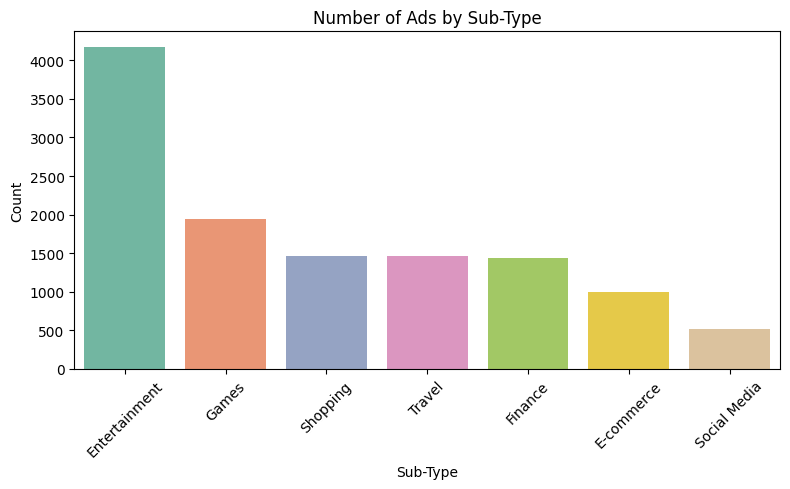

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sub_type', order=df['sub_type'].value_counts().index, palette='Set2')
plt.title('Number of Ads by Sub-Type')
plt.xlabel('Sub-Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This bar chart shows the distribution of ads by sub-type. It helps us quickly identify which ad formats (e.g., Banner, InApp, Interstitial) appear most frequently in the dataset, giving insight into common ad strategies.

<ipython-input-15-0cd5a8a798f6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type', y='cost', palette='coolwarm')


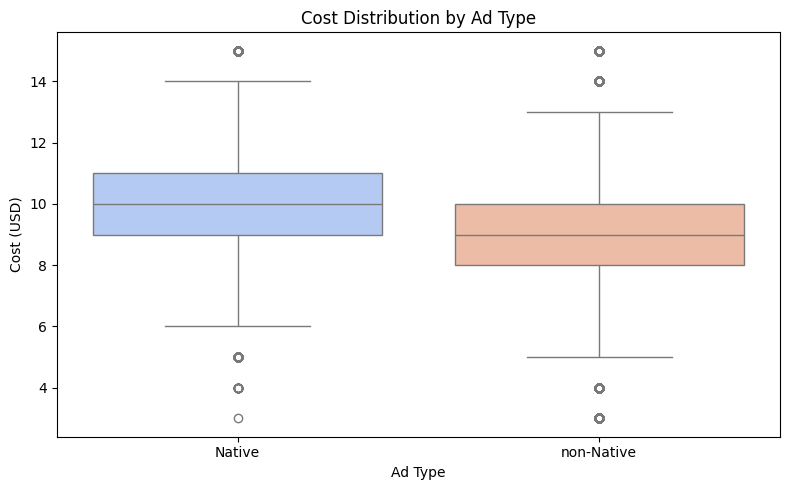

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='type', y='cost', palette='coolwarm')
plt.title('Cost Distribution by Ad Type')
plt.xlabel('Ad Type')
plt.ylabel('Cost (USD)')
plt.tight_layout()
plt.show()

This boxplot compares the cost distribution between Native and non-Native ads. It highlights central tendencies, spread, and potential outliers, helping us understand which type of ad typically incurs higher or more variable costs.

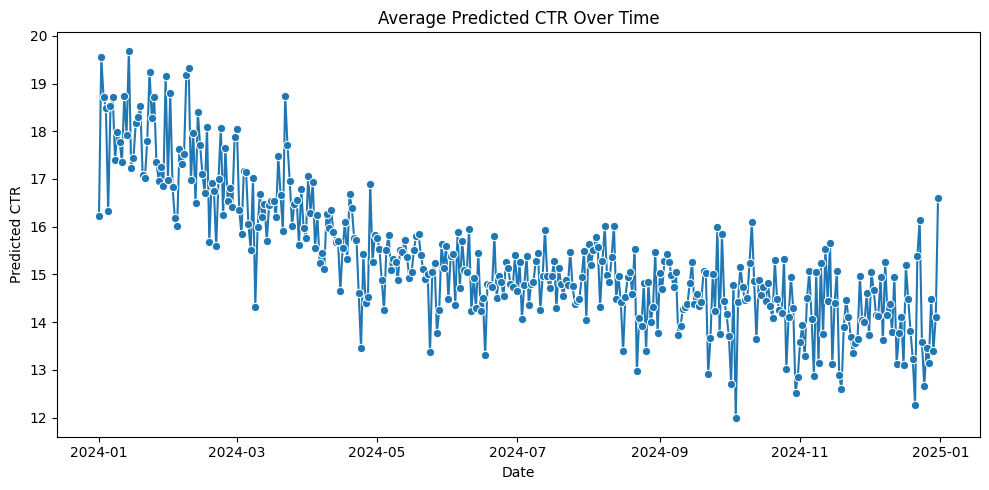

In [ ]:
df['date'] = pd.to_datetime(df['date'])
ctr_over_time = df.groupby('date')['predicted_ctr'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=ctr_over_time, x='date', y='predicted_ctr', marker='o')
plt.title('Average Predicted CTR Over Time')
plt.xlabel('Date')
plt.ylabel('Predicted CTR')
plt.tight_layout()
plt.show()

This line plot shows how the average predicted click-through rate (CTR) changes over time. It reveals performance trends and helps identify any peaks or drops that may indicate seasonal patterns or campaign effects.

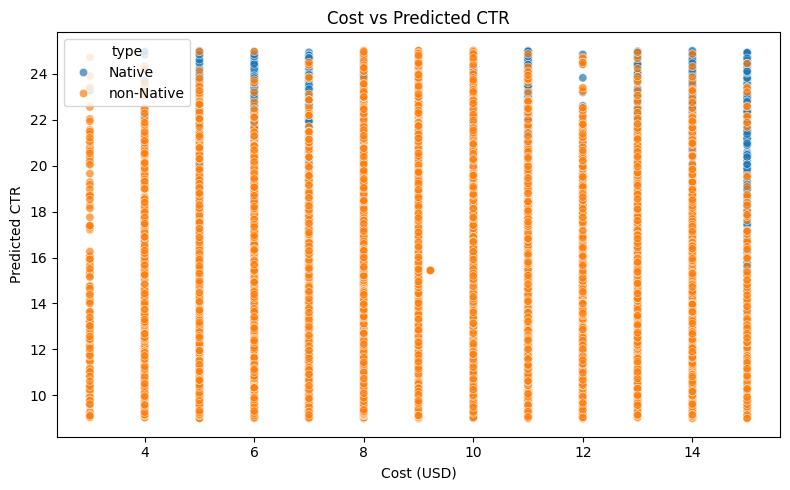

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='cost', y='predicted_ctr', hue='type', alpha=0.7)
plt.title('Cost vs Predicted CTR')
plt.xlabel('Cost (USD)')
plt.ylabel('Predicted CTR')
plt.tight_layout()
plt.show()

This scatter plot explores the relationship between ad cost and predicted CTR, with points colored by ad type. It helps identify whether higher spending correlates with better performance and if trends differ between Native and non-Native ads.

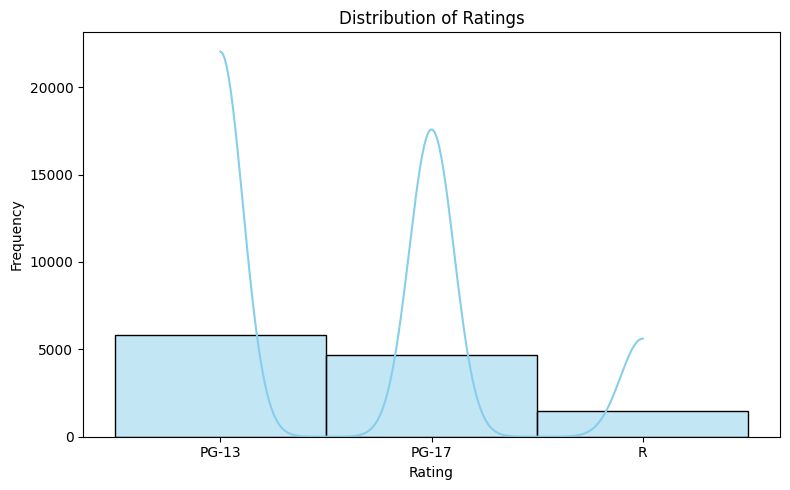

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='rating', bins=10, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

This histogram shows the distribution of ad ratings. The KDE curve overlays a smooth estimate of the frequency, helping us understand which ratings are most common and how they’re spread across the dataset.


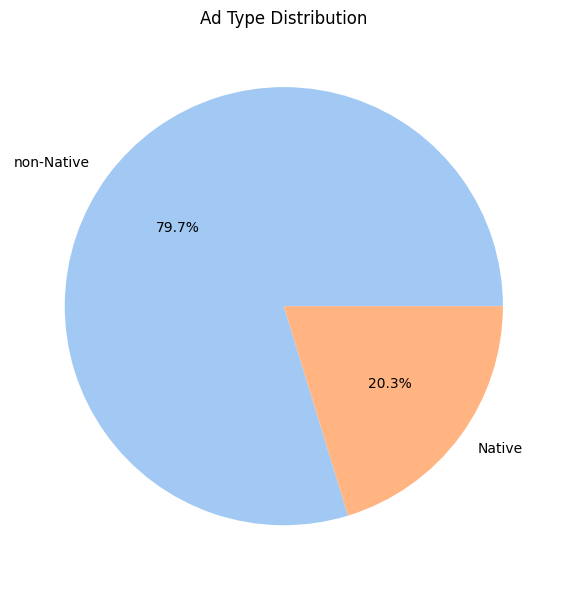

In [ ]:
type_counts = df['type'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Ad Type Distribution')
plt.tight_layout()
plt.show()

This pie chart illustrates the overall share of Native vs. non-Native ads. It's an easy way to visualize how ad types are divided in the dataset and whether one type dominates the ad strategy.

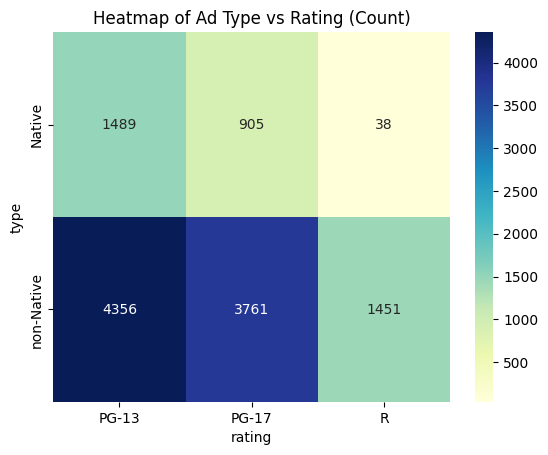

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pivot_table = df.pivot_table(index='type', columns='rating', values='cost', aggfunc='count', fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap of Ad Type vs Rating (Count)")
plt.show()

This heatmap displays the correlation between numeric features, cost and predicted CTR. The annotated values help us quickly assess the strength and direction of their relationship, supporting deeper data-driven insights.

This project was all about digging into how online ads perform, using object-oriented programming and some data visualization tricks.
We started by designing a flexible class system to represent different kinds and sub-kinds of ads. Then, with the help of a pickle file, we loaded the data, organized it nicely, and saved it as a CSV so we could dig into it with ease.
Once the data was in a pandas DataFrame, we clean-up the mess by dealing with any missing info.
For numerical stuff like cost and predicted click-through rate, we filled in the gaps with the average values. For categories like rating and date, we used the most common value to keep things consistent. With our data cleaned up, we went ahead and created seven different kinds of charts-bar graphs, boxplots, line charts, scatter plots, histograms, pie charts, and heatmaps.
These visuals helped us spot trends and patterns, like how ads are spread out, how costs change over time, and how spending relates to click-throughs.
All in all, this project showed how combining good programming, thorough data cleaning, and visual storytelling can really help us find useful insights in ad performance data.
